In [1]:
from get_alibi import get_alibi

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nb_heads = 8
nb_patches_per_side = 3
alibi, distances, slope = get_alibi(nb_heads = nb_heads, nb_patches_per_side = nb_patches_per_side)

## Plot entire distance matrix
Shape: (nb_patches_per_side^2 +1, nb_patches_per_side^2 +1)

In [4]:
ticks = [patch_index for patch_index in range(nb_patches_per_side**2 +1)]
labels = ["cls"]
for i in range(nb_patches_per_side**2):
    labels.append(str(i))

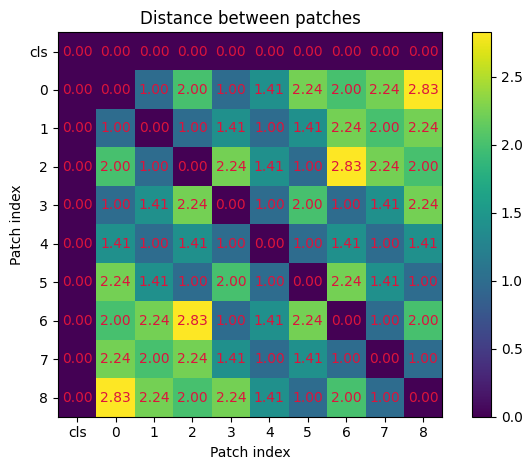

In [5]:
fig, ax = plt.subplots()
plt.imshow(distances, cmap="viridis")
plt.ylabel("Patch index")
plt.xlabel("Patch index")
ax.set_xticks(ticks)  
ax.set_xticklabels(labels=labels)
ax.set_yticks(ticks)  
ax.set_yticklabels(labels=labels)
plt.title("Distance between patches")


for i in range(nb_patches_per_side**2 +1):
    for j in range(nb_patches_per_side**2 +1):
        d = "{0:.2f}".format(np.asarray(distances[i, j]))
        ax.text(j, i, d, color='crimson', ha='center', va='center')

plt.colorbar()
plt.tight_layout()
plt.show()

## Plot all distance metrics, from a given patch to all other patches
*Shape: (nb_patches_per_side, nb_patches_per_side)*

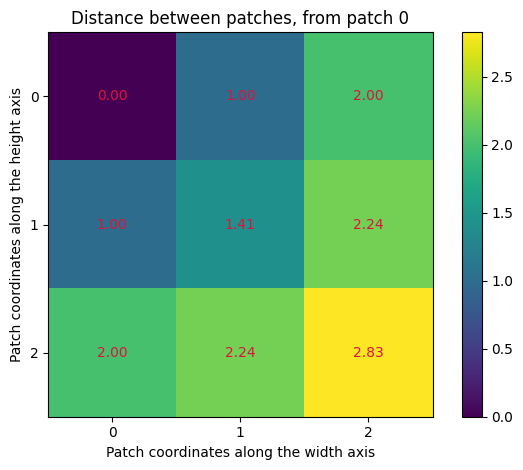

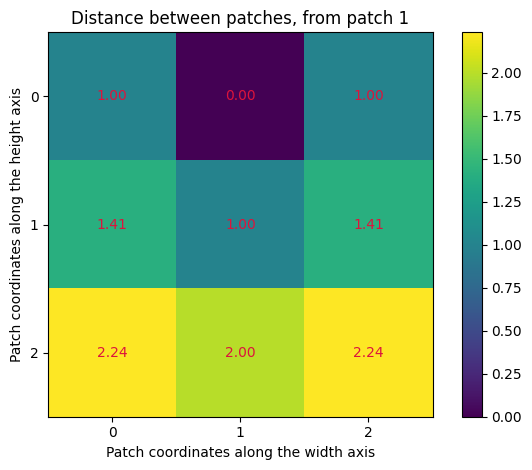

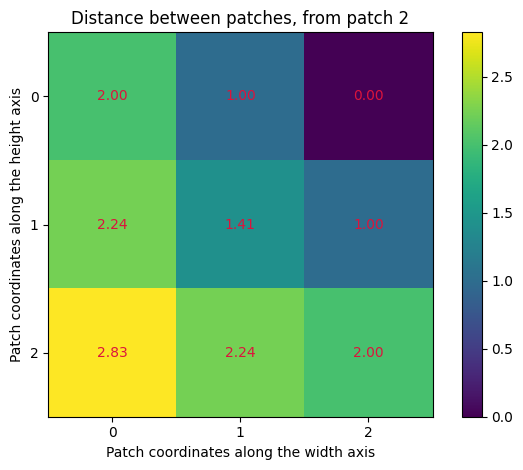

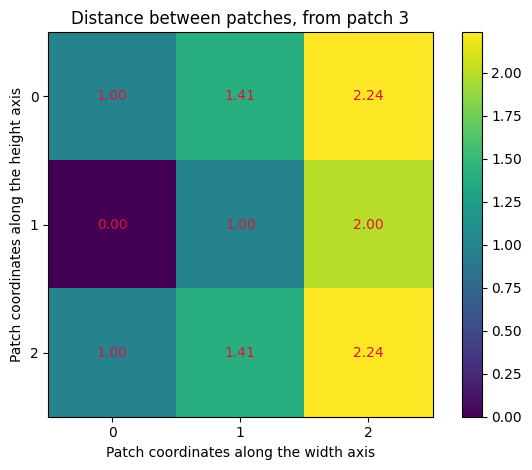

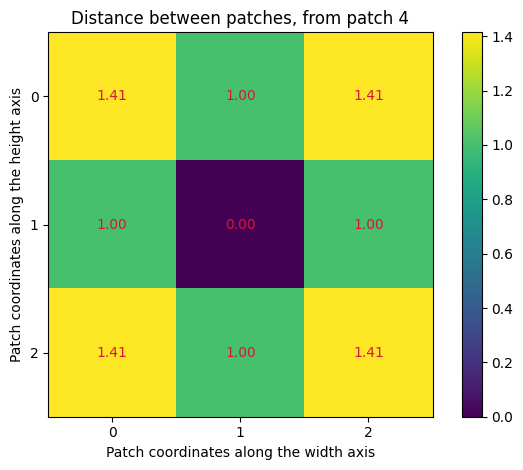

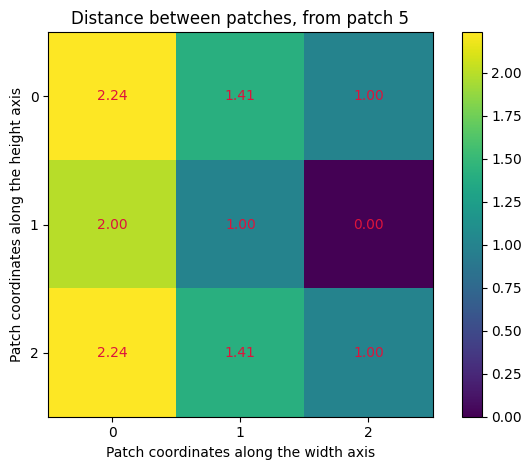

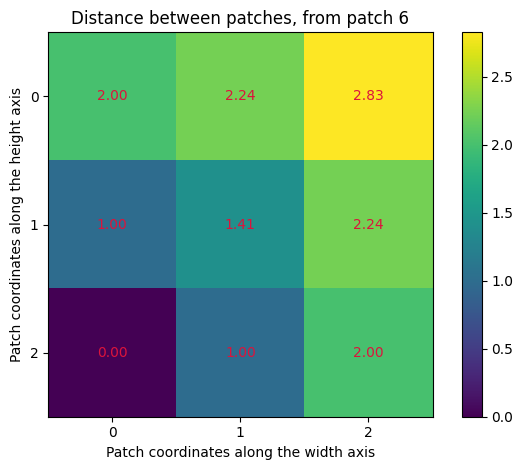

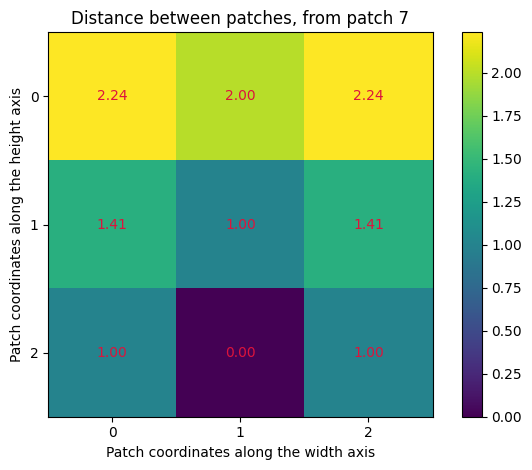

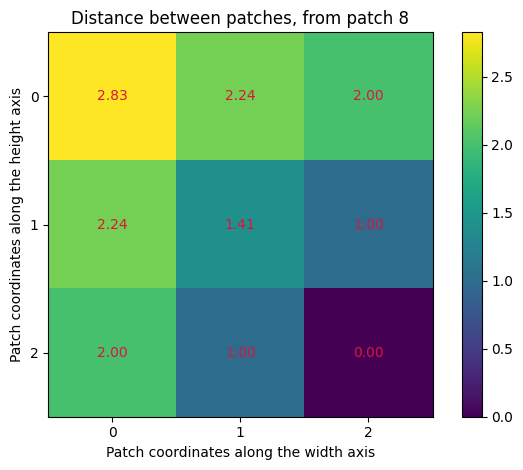

In [6]:
for patch_index in range(nb_patches_per_side**2):

  distance = distances[patch_index +1, 1:]
  distance = distance.view(nb_patches_per_side, nb_patches_per_side)
  ticks = [i for i in range(nb_patches_per_side)]

  fig, ax = plt.subplots()
  plt.imshow(distance, cmap="viridis")
  plt.ylabel("Patch coordinates along the height axis")
  plt.xlabel("Patch coordinates along the width axis")
  plt.title("Distance between patches, from patch {}".format(patch_index))
  ax.set_xticks(ticks)  
  ax.set_yticks(ticks)  

  for i in range(nb_patches_per_side):
      for j in range(nb_patches_per_side):
          d = "{0:.2f}".format(np.asarray(distance[i, j]))
          ax.text(j, i, d, color='crimson', ha='center', va='center')

  plt.colorbar()
  plt.tight_layout()
  plt.show()


## Plot linear biases
Shape: (nb_patches_per_side^2 +1, nb_patches_per_side^2 +1)

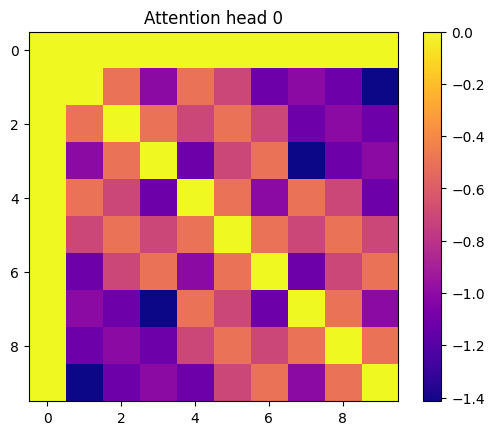

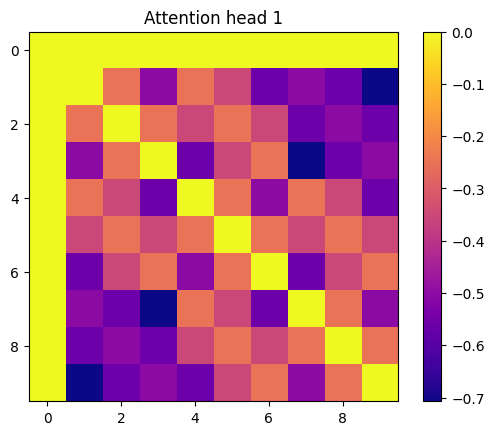

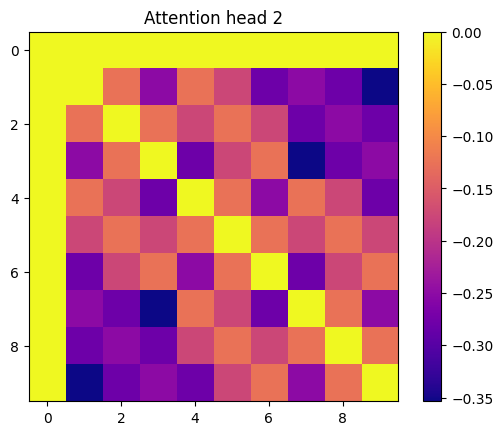

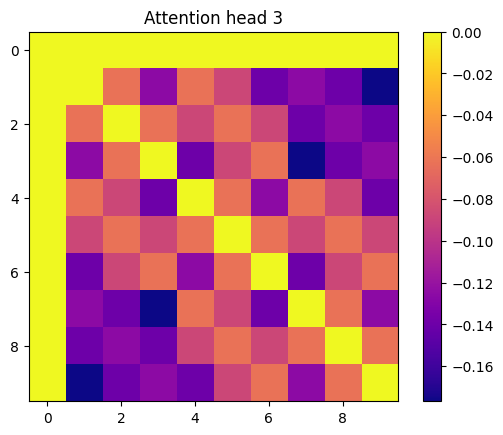

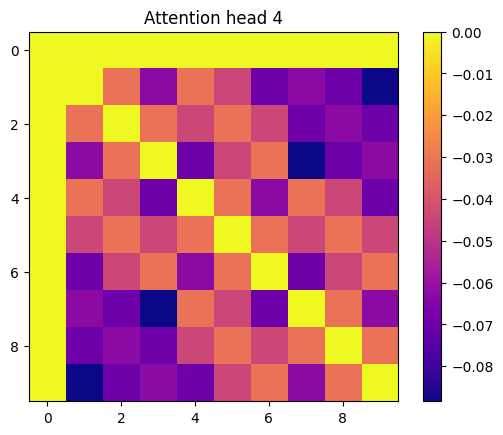

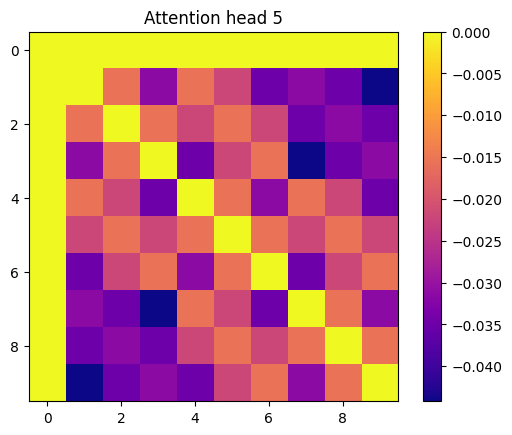

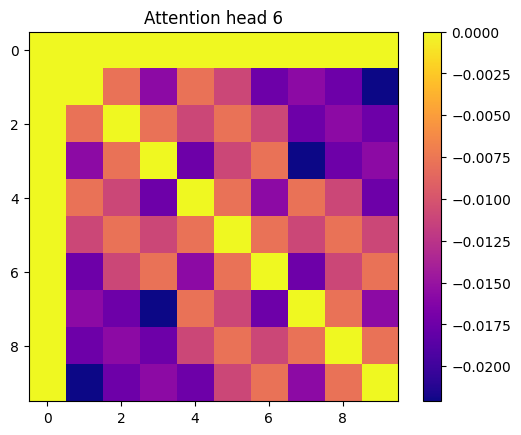

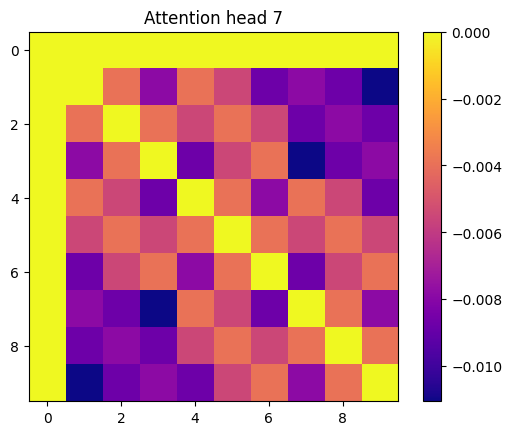

In [7]:
for head_index in range(nb_heads):
  plt.figure()
  plt.imshow(alibi[0, head_index, :, :], cmap="plasma")
  plt.title("Attention head {}".format(head_index))
  plt.colorbar()
plt.show()

## Plot slope
*Shape: (nb_heads)*

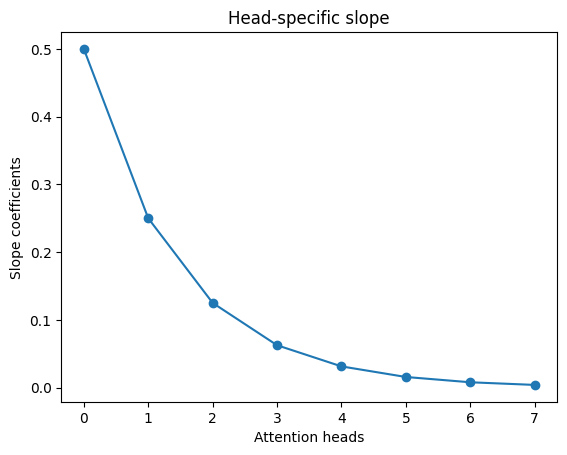

In [8]:
plt.figure()
plt.plot(slope, "-o")
plt.ylabel("Slope coefficients")
plt.xlabel("Attention heads")
plt.title("Head-specific slope")
plt.show()